In [21]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates

In [27]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    
    

In [78]:
def graph_data():
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        if 'Date' not in line:
            split_line = line.split(',')
            stock_data.append(line)
    
    date, closep, highp, lowp, adjclose, openp, volume = np.loadtxt(stock_data,
                                                        delimiter=',',
                                                         unpack=True,
                                                         converters={0: bytespdate2num('%Y-%m-%d')})
    
    ax1.plot_date(date, closep, '-')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True, color='g')
        
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('sample graph')
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.18, right=0.94, top=0.95, wspace=0.2, hspace=0)
    plt.show() 

No handles with labels found to put in legend.


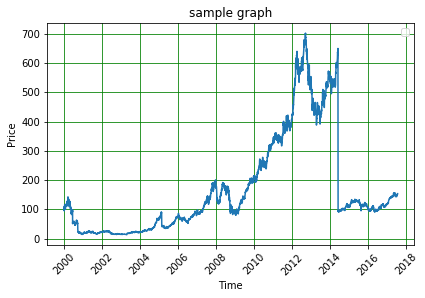

In [79]:
graph_data()